In [197]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt


In [198]:
# Load the snort generated  alert data

alert_df = pd.read_csv('/Users/marshal/Desktop/test/Alert1.csv')

# Load the labeled dataset 

label_df = pd.read_csv('/Users/marshal/Desktop/test/Mergeddata.csv', encoding='ISO-8859-1')



In [199]:
# to exclude the 'Positives' column in the alert_df
columns_to_fill = [col for col in alert_df.columns if col != 'Positives']

# NaN values  replaced with 0 in all columns except 'Positives'
alert_df[columns_to_fill] = alert_df[columns_to_fill].fillna(0)

# Print the alert_df to verify 
print(alert_df)

          Source_IP   Source_Port  Destination_IP   Destination_Port  \
0     192.168.10.14           0.0    192.168.10.3                0.0   
1     192.168.10.14           0.0    192.168.10.3                0.0   
2     192.168.10.14           0.0    192.168.10.3                0.0   
3     192.168.10.14           0.0    192.168.10.3                0.0   
4     192.168.10.14           0.0    192.168.10.3                0.0   
...             ...           ...             ...                ...   
7647  192.168.10.25       54244.0   192.168.10.50              139.0   
7648     14.0.67.56          80.0   192.168.10.25            54187.0   
7649     172.16.0.1           0.0    192.168.10.8                0.0   
7650     172.16.0.1           0.0   192.168.10.15                0.0   
7651  136.243.33.19          80.0   192.168.10.12            47122.0   

                                          event.msg Protocol  \
0     ICMP Destination Unreachable Port Unreachable     ICMP   
1     I

In [200]:
alert_df

,Source_IP,Source_Port,Destination_IP,Destination_Port,event.msg,Protocol,Timestamp,Positives
0,192.168.10.14,0.0,192.168.10.3,0.0,ICMP Destination Unreachable Port Unreachable,ICMP,07/07-08:00:51.577564,NaN
1,192.168.10.14,0.0,192.168.10.3,0.0,ICMP Destination Unreachable Port Unreachable,ICMP,07/07-08:00:51.577567,NaN
2,192.168.10.14,0.0,192.168.10.3,0.0,ICMP Destination Unreachable Port Unreachable,ICMP,07/07-08:00:52.478240,NaN
3,192.168.10.14,0.0,192.168.10.3,0.0,ICMP Destination Unreachable Port Unreachable,ICMP,07/07-08:00:52.478244,NaN
4,192.168.10.14,0.0,192.168.10.3,0.0,ICMP Destination Unreachable Port Unreachable,ICMP,07/07-08:01:05.161721,NaN
...,...,...,...,...,...,...,...,...
7647,192.168.10.25,54244.0,192.168.10.50,139.0,NETBIOS SMB IPC$ unicode share access,TCP,07/07-16:01:22.145494,NaN
7648,14.0.67.56,80.0,192.168.10.25,54187.0,INFO web bug 0x0 gif attempt,TCP,07/07-16:00:52.263713,NaN
7649,172.16.0.1,0.0,192.168.10.8,0.0,ICMP Destination Unreachable Host Unreachable,ICMP,07/07-16:01:24.606662,NaN
7650,172.16.0.1,0.0,192.168.10.15,0.0,ICMP Destination Unreachable Host Unreachable,ICMP,07/07-16:01:24.606663,NaN


In [202]:
label_df

,ï»¿Flow_ID,Source_IP,Source_Port,Destination_IP,Destination_Port,Protocol,Timestamp,Label
0,192.168.10.5-104.16.207.165-54865-443-6,104.16.207.165,443,192.168.10.5,54865,6,07/07/2017 03:30,BENIGN
1,192.168.10.5-104.16.28.216-55054-80-6,104.16.28.216,80,192.168.10.5,55054,6,07/07/2017 03:30,BENIGN
2,192.168.10.5-104.16.28.216-55055-80-6,104.16.28.216,80,192.168.10.5,55055,6,07/07/2017 03:30,BENIGN
3,192.168.10.16-104.17.241.25-46236-443-6,104.17.241.25,443,192.168.10.16,46236,6,07/07/2017 03:30,BENIGN
4,192.168.10.5-104.19.196.102-54863-443-6,104.19.196.102,443,192.168.10.5,54863,6,07/07/2017 03:30,BENIGN
...,...,...,...,...,...,...,...,...
703240,192.168.10.3-192.168.10.14-53-51018-17,192.168.10.14,51018,192.168.10.3,53,17,07/07/2017 12:59,BENIGN
703241,192.168.10.3-192.168.10.14-53-49984-17,192.168.10.14,49984,192.168.10.3,53,17,07/07/2017 12:59,BENIGN
703242,192.168.10.3-192.168.10.14-53-64015-17,192.168.10.14,64015,192.168.10.3,53,17,07/07/2017 12:59,BENIGN
703243,192.168.10.17-198.100.147.178-123-123-17,192.168.10.17,123,198.100.147.178,123,17,07/07/2017 12:59,BENIGN


In [203]:
print(alert_df.columns)
print(label_df.columns)
#any space before or after variable, python consider it as a different variable,

Index([' Source_IP', ' Source_Port', ' Destination_IP', ' Destination_Port',
       'event.msg', 'Protocol', ' Timestamp', 'Positives'],
      dtype='object')
Index(['ï»¿Flow_ID', ' Source_IP', ' Source_Port', ' Destination_IP',
       ' Destination_Port', ' Protocol', ' Timestamp', ' Label'],
      dtype='object')


In [204]:
#to remove the empty spaces in  a column names, 
alert_df.columns = alert_df.columns.str.strip()
label_df.columns = label_df.columns.str.strip()

In [205]:
#to check 
print(alert_df.columns)
print(label_df.columns)

Index(['Source_IP', 'Source_Port', 'Destination_IP', 'Destination_Port',
       'event.msg', 'Protocol', 'Timestamp', 'Positives'],
      dtype='object')
Index(['ï»¿Flow_ID', 'Source_IP', 'Source_Port', 'Destination_IP',
       'Destination_Port', 'Protocol', 'Timestamp', 'Label'],
      dtype='object')


In [206]:
# Merge 'alert_df and label_df based on the columns  to match
merged_df = alert_df.merge(label_df, on=['Source_IP', 'Source_Port', 'Destination_IP', 'Destination_Port'], how='inner')

#  boolean mask for matching rows
mask = merged_df.shape[0] > 0  
# Add a new 'Positives' column to 'alert_df' 
alert_df['Positives'] = mask

In [207]:


# to create a boolean mask for matching rows based on the specified columns
mask = (
    alert_df['Source_IP'].isin(label_df['Source_IP']) &
    alert_df['Source_Port'].isin(label_df['Source_Port']) &
    alert_df['Destination_IP'].isin(label_df['Destination_IP']) &
    alert_df['Destination_Port'].isin(label_df['Destination_Port'])
)

#  mask for rows in  the label_df where Label" column is  benign 
benign_mask = label_df['Label'] == 'benign'

# Update the 'Positives' column in 'alert_df' based on both masks
alert_df['Positives'] = mask & ~benign_mask


In [208]:
alert_df

,Source_IP,Source_Port,Destination_IP,Destination_Port,event.msg,Protocol,Timestamp,Positives
0,192.168.10.14,0.0,192.168.10.3,0.0,ICMP Destination Unreachable Port Unreachable,ICMP,07/07-08:00:51.577564,True
1,192.168.10.14,0.0,192.168.10.3,0.0,ICMP Destination Unreachable Port Unreachable,ICMP,07/07-08:00:51.577567,True
2,192.168.10.14,0.0,192.168.10.3,0.0,ICMP Destination Unreachable Port Unreachable,ICMP,07/07-08:00:52.478240,True
3,192.168.10.14,0.0,192.168.10.3,0.0,ICMP Destination Unreachable Port Unreachable,ICMP,07/07-08:00:52.478244,True
4,192.168.10.14,0.0,192.168.10.3,0.0,ICMP Destination Unreachable Port Unreachable,ICMP,07/07-08:01:05.161721,True
...,...,...,...,...,...,...,...,...
7647,192.168.10.25,54244.0,192.168.10.50,139.0,NETBIOS SMB IPC$ unicode share access,TCP,07/07-16:01:22.145494,True
7648,14.0.67.56,80.0,192.168.10.25,54187.0,INFO web bug 0x0 gif attempt,TCP,07/07-16:00:52.263713,True
7649,172.16.0.1,0.0,192.168.10.8,0.0,ICMP Destination Unreachable Host Unreachable,ICMP,07/07-16:01:24.606662,True
7650,172.16.0.1,0.0,192.168.10.15,0.0,ICMP Destination Unreachable Host Unreachable,ICMP,07/07-16:01:24.606663,True


In [209]:
alert_df['Positives'].value_counts()

Positives
True     6622
False    1030
Name: count, dtype: int64

In [218]:
alert_df

,Source_IP,Source_Port,Destination_IP,Destination_Port,event.msg,Protocol,Timestamp,Positives
0,192.168.10.14,0.0,192.168.10.3,0.0,ICMP Destination Unreachable Port Unreachable,ICMP,07/07-08:00:51.577564,True
1,192.168.10.14,0.0,192.168.10.3,0.0,ICMP Destination Unreachable Port Unreachable,ICMP,07/07-08:00:51.577567,True
2,192.168.10.14,0.0,192.168.10.3,0.0,ICMP Destination Unreachable Port Unreachable,ICMP,07/07-08:00:52.478240,True
3,192.168.10.14,0.0,192.168.10.3,0.0,ICMP Destination Unreachable Port Unreachable,ICMP,07/07-08:00:52.478244,True
4,192.168.10.14,0.0,192.168.10.3,0.0,ICMP Destination Unreachable Port Unreachable,ICMP,07/07-08:01:05.161721,True
...,...,...,...,...,...,...,...,...
7647,192.168.10.25,54244.0,192.168.10.50,139.0,NETBIOS SMB IPC$ unicode share access,TCP,07/07-16:01:22.145494,True
7648,14.0.67.56,80.0,192.168.10.25,54187.0,INFO web bug 0x0 gif attempt,TCP,07/07-16:00:52.263713,True
7649,172.16.0.1,0.0,192.168.10.8,0.0,ICMP Destination Unreachable Host Unreachable,ICMP,07/07-16:01:24.606662,True
7650,172.16.0.1,0.0,192.168.10.15,0.0,ICMP Destination Unreachable Host Unreachable,ICMP,07/07-16:01:24.606663,True


In [219]:
# to check the number of true and false values in the 'Positives' column
positives_counts = alert_df['Positives'].value_counts()

#  it Print the counts
print("Number of True Positives:", positives_counts[True])
print("Number of False Positives:", positives_counts[False])


Number of True Positives: 6622
Number of False Positives: 1030


In [213]:
#to save the label generated alert file
file_path = '/Users/marshal/Desktop/test/label_generated_standalone_snort.csv'
alert_df.to_csv(file_path, index=False)

# Specify the file path and name
file_path = '/Users/marshal/Desktop/test/label_generated_standalone_snort.csv'

# Save the DataFrame to CSV
alert_df.to_csv(file_path, index=False)



In [214]:
# Count the occurrences of each label in the 'Label' column
label_counts = label_df['Label'].value_counts()

# Print the counts for each label
print(label_counts)


Label
BENIGN      414322
PortScan    158930
DDoS        128027
Bot           1966
Name: count, dtype: int64


In [215]:
alert_df['Positives'].value_counts()

Positives
True     6622
False    1030
Name: count, dtype: int64

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


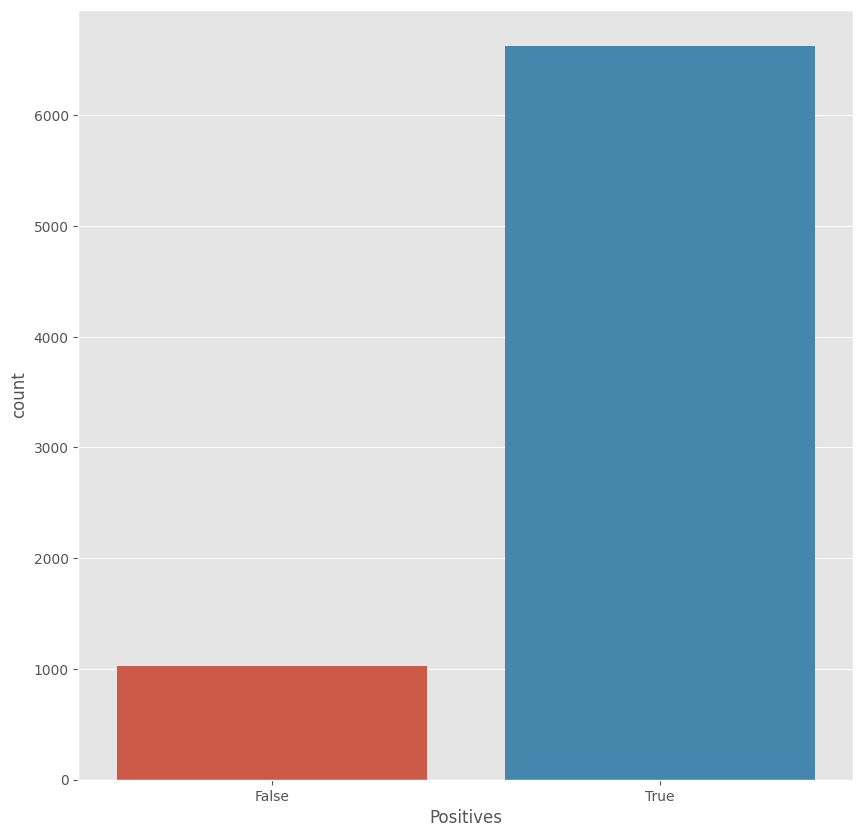

In [216]:

import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10,10))
plt.style.use('ggplot')
sns.countplot(data=alert_df, x="Positives")
plt.show()

In [217]:
alert_df


,Source_IP,Source_Port,Destination_IP,Destination_Port,event.msg,Protocol,Timestamp,Positives
0,192.168.10.14,0.0,192.168.10.3,0.0,ICMP Destination Unreachable Port Unreachable,ICMP,07/07-08:00:51.577564,True
1,192.168.10.14,0.0,192.168.10.3,0.0,ICMP Destination Unreachable Port Unreachable,ICMP,07/07-08:00:51.577567,True
2,192.168.10.14,0.0,192.168.10.3,0.0,ICMP Destination Unreachable Port Unreachable,ICMP,07/07-08:00:52.478240,True
3,192.168.10.14,0.0,192.168.10.3,0.0,ICMP Destination Unreachable Port Unreachable,ICMP,07/07-08:00:52.478244,True
4,192.168.10.14,0.0,192.168.10.3,0.0,ICMP Destination Unreachable Port Unreachable,ICMP,07/07-08:01:05.161721,True
...,...,...,...,...,...,...,...,...
7647,192.168.10.25,54244.0,192.168.10.50,139.0,NETBIOS SMB IPC$ unicode share access,TCP,07/07-16:01:22.145494,True
7648,14.0.67.56,80.0,192.168.10.25,54187.0,INFO web bug 0x0 gif attempt,TCP,07/07-16:00:52.263713,True
7649,172.16.0.1,0.0,192.168.10.8,0.0,ICMP Destination Unreachable Host Unreachable,ICMP,07/07-16:01:24.606662,True
7650,172.16.0.1,0.0,192.168.10.15,0.0,ICMP Destination Unreachable Host Unreachable,ICMP,07/07-16:01:24.606663,True


In [129]:
alert_df['Positives'].value_counts()

Positives
True     6622
False    1030
Name: count, dtype: int64

In [220]:
# Given data for Snort's performance
total_packets = 703245
benign_packets = 414322
malicious_packets = 288923
snort_alerts = 7652
true_positives = 6622
false_positives = 1030


In [221]:
#to find true negatives
true_negatives = benign_packets - false_positives
print(f"True Negatives (TN): {true_negatives}")


True Negatives (TN): 413292


In [222]:
#to find false negatives

false_negatives = malicious_packets - true_positives
print(f"False Negatives (FN): {false_negatives}")

False Negatives (FN): 282301


In [223]:
#precision

precision = true_positives / (true_positives + false_positives)
print(f"Precision: {precision:.3f}")

Precision: 0.865


In [227]:
#recall

recall = true_positives / (true_positives + false_negatives)
print(f"Recall: {recall:.3f}")

Recall: 0.023


In [228]:
#F1-score for imbalanced datasets

f1_score = 2 * (precision * recall) / (precision + recall)
print(f"F1 Score: {f1_score:.3f}")

F1 Score: 0.045


In [226]:

# Data for plotting

labels = ['True Positives', 'True Negatives', 'False Positives', 'False Negatives']
values = [true_positives, true_negatives, false_positives, false_negatives]


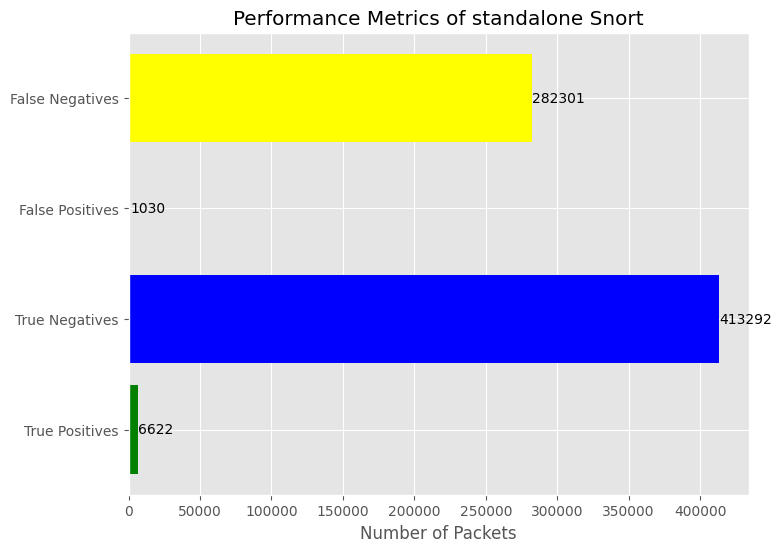

In [165]:

# Create bar chart
plt.figure(figsize=(8,6))
plt.barh(labels, values, color=['green', 'blue', 'red', 'yellow'])
plt.xlabel('Number of Packets')
plt.title('Performance Metrics of standalone Snort')
plt.grid(True)


for i, v in enumerate(values):
    plt.text(v, i, f"{v}", va='center')

plt.show()


In [234]:

#  precision, recall, and F1 score values

precision = 0.865
recall = 0.23
f1_score = 0.45


In [235]:
# Labels for a bars
labels = ['Precision', 'Recall', 'F1 Score']

#  load the Values to the bars
values = [precision, recall, f1_score]

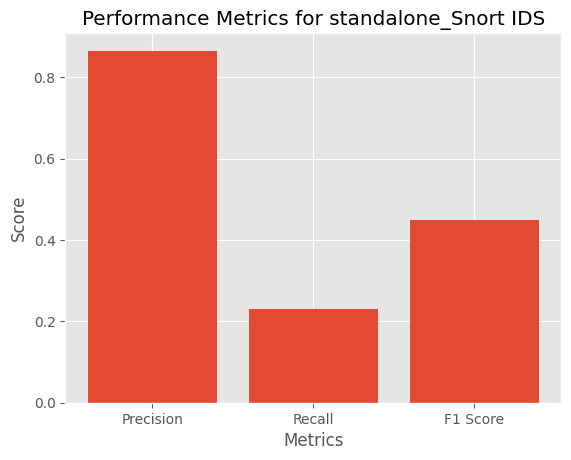

In [238]:
# to Create bar chart
plt.bar(labels, values)

plt.title('Performance Metrics for standalone_Snort IDS')
plt.xlabel('Metrics')
plt.ylabel('Score')

#  To Show the chart
plt.show()

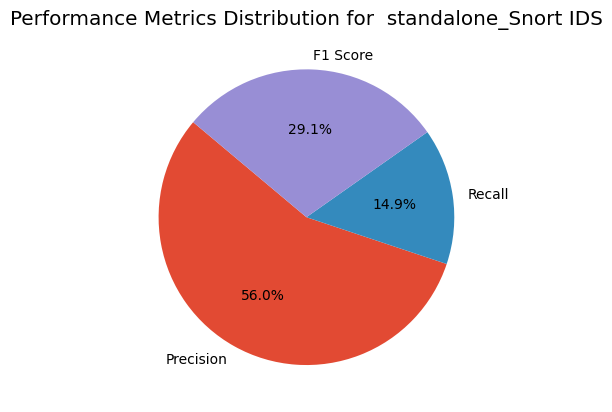

In [237]:


# Create  pie chart
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)

# title
plt.title('Performance Metrics Distribution for  standalone_Snort IDS')

#  to Show the chart
plt.show()
